![Bluemetrica](bluemetrica_vlarge.png)

# Drzewa decyzyjne, lasy losowe, SVM, sieci neuronowe
-------------------

# Przygotowanie danych

In [1]:
import numpy as np         # algebra liniowa
import pandas as pd        # praca z danymi
import matplotlib.pyplot as plt  # wykresy
import seaborn as sns      # wizualizacje statystczne
%matplotlib inline  
# wykresy wyswietlane od razu

In [2]:
# credit.csv  w folderze data
%pwd

'C:\\Users\\ewaru\\Documents\\Python\\Machine Learning z Python'

In [3]:
credit = pd.read_csv("data//credit.csv")

### Oglądamy dane

In [4]:
credit.head()

checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   

         job  dependents phone default  
0    skilled           1   yes      no  
1    skilled           1    no     yes  
2  unskilled           2    no      no  
3    skilled           2    no      no  
4    skilled           2    no     yes

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [6]:
credit.describe()

months_loan_duration        amount  percent_of_income  \
count           1000.000000   1000.000000        1000.000000   
mean              20.903000   3271.258000           2.973000   
std               12.058814   2822.736876           1.118715   
min                4.000000    250.000000           1.000000   
25%               12.000000   1365.500000           2.000000   
50%               18.000000   2319.500000           3.000000   
75%               24.000000   3972.250000           4.000000   
max               72.000000  18424.000000           4.000000   

       years_at_residence          age  existing_loans_count   dependents  
count         1000.000000  1000.000000           1000.000000  1000.000000  
mean             2.845000    35.546000              1.407000     1.155000  
std              1.103718    11.375469              0.577654     0.362086  
min              1.000000    19.000000              1.000000     1.000000  
25%              2.000000    27.000000              1.000000     1.000000  
50%              3.000000    33.000000              1.000000     1.000000  
75%              4.000000    42.000000              2.000000     1.000000  
max              4.000000    75.000000              4.000000     2.000000

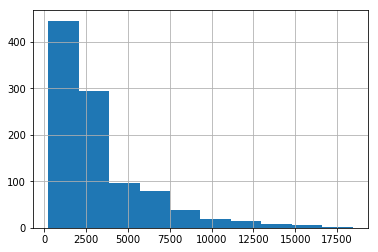

In [7]:
credit.amount.hist()

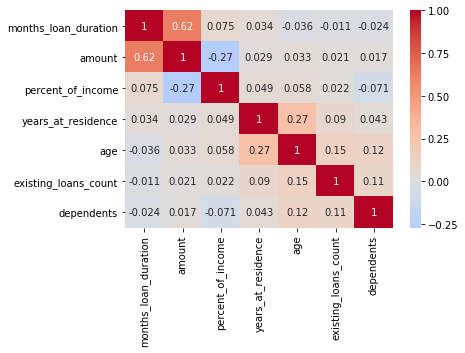

In [8]:
sns.heatmap(credit.corr(), cmap = "coolwarm", center = 0, annot = True)

In [9]:
credit.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

### Podział na zbiór treningowy i testowy

In [10]:
# zamiana zmiennych kategorii na dummies (0 - 1) 
credit_dum = pd.get_dummies(credit, drop_first=True) 

In [11]:
credit_dum.columns

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'checking_balance_< 0 DM', 'checking_balance_> 200 DM',
       'checking_balance_unknown', 'credit_history_good',
       'credit_history_perfect', 'credit_history_poor',
       'credit_history_very good', 'purpose_car', 'purpose_car0',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'savings_balance_500 - 1000 DM',
       'savings_balance_< 100 DM', 'savings_balance_> 1000 DM',
       'savings_balance_unknown', 'employment_duration_4 - 7 years',
       'employment_duration_< 1 year', 'employment_duration_> 7 years',
       'employment_duration_unemployed', 'other_credit_none',
       'other_credit_store', 'housing_own', 'housing_rent', 'job_skilled',
       'job_unemployed', 'job_unskilled', 'phone_yes', 'default_yes'],
      dtype='object')

In [12]:
# podzielmy 0.2 seed 123
from sklearn.model_selection import train_test_split
X = credit_dum.drop('default_yes', axis = 1)
y = credit_dum['default_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 123)

In [13]:
print(X_train.shape); print(X_test.shape)

(800, 35)
(200, 35)


### Budowa drzewa decyzyjnego

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
tree_model = DecisionTreeClassifier(random_state=123)

In [16]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

### Graf zawierający drzewo

In [17]:
from sklearn import tree
import pydotplus

In [18]:
tree.export_graphviz(tree_model, out_file="tree.dot")

### Stwórzmy nasze drzewo online
http://webgraphviz.com/

Na stronie możemy wkleić zawartość pliku .dot w celu wizualizacji grafu

In [19]:
X_train.columns[9]

'checking_balance_unknown'

### Jakość modelu

In [20]:
# accuracy dla treningowego i testowego
# performance measures
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_model, X_train, y_train, cv=5,scoring='accuracy')
print("Mean train set accuracy: {:.4f}, accuracy: {}".format(np.mean(scores), scores.round(4)))
print("Test set accuracy: {:.4f}".format(tree_model.score(X_test, y_test)))

# confusion matrix

Mean train set accuracy: 0.6762, accuracy: [ 0.7019  0.7062  0.6812  0.6125  0.6792]
Test set accuracy: 0.6850


In [21]:
from sklearn import metrics

In [22]:
pred = tree_model.predict(X_test)
metrics.confusion_matrix(y_test, pred)

array([[108,  31],
       [ 32,  29]], dtype=int64)

### Szukanie najlepszych parametrów modelu metodą GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
DecisionTreeClassifier()
parameters = {
    'max_depth' : [2, 6, 8,12, 20, 30],
    'min_samples_leaf' : [1, 2, 5, 10],
    'min_samples_split' : [2, 4, 6],
    'max_features' : [0.2, 0.5, 0.7],
}

In [25]:
tree_grid = GridSearchCV(tree_model, parameters, n_jobs = -1, verbose = 1, scoring = 'roc_auc')

In [26]:
tree_grid.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:   14.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 6, 8, 12, 20, 30], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 4, 6], 'max_features': [0.2, 0.5, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [27]:
tree_grid.best_params_ # najlepsza kombinacja parametrów

{'max_depth': 6,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [28]:
tree_grid.best_score_ # AUC

0.72257351196016373

In [29]:
pred_grid = tree_grid.predict(X_test)
print(metrics.confusion_matrix(y_test, pred_grid))
print(metrics.classification_report(y_test, pred_grid))

[[110  29]
 [ 22  39]]
             precision    recall  f1-score   support

          0       0.83      0.79      0.81       139
          1       0.57      0.64      0.60        61

avg / total       0.75      0.74      0.75       200



In [30]:
tree_grid.score(X_test, y_test) # Accuracy

0.76777921924755277

# Random forest

Metoda ensamble polegająca na budowie wielu drzew decyzyjnych i uśredninieniu wyników.
Każde drzewo jest inne dzieki losowaniu zmiennych używanych w każdym z rozgałęzień.

In [4]:
# h2o - bardzo dobre lasy losowe ( do duzych modeli) - przykład h2o znajduje się w cwiczeniu z prognozowaniem cen domów

from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth' : [6, 8, 12, 20],
    'min_samples_leaf' : [1, 2, 5],
    'min_samples_split' : [2, 4, 6],
    'max_features' : [0.2, 0.5, 0.7],    
}

# od razu robimy tuning modelu
rf_grid = GridSearchCV(rf, parameters, n_jobs=-1, verbose =1, scoring = "roc_auc")
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:  2.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [6, 8, 12, 20], 'min_samples_leaf': [1, 2, 5], 'min_samples_split': [2, 4, 6], 'max_features': [0.2, 0.5, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [33]:
rf_grid.best_params_

{'max_depth': 8,
 'max_features': 0.2,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 50}

In [34]:
rf_grid.best_score_

0.77188688718439036

### Porównanie krzywych ROC - drzewa i lasy losowe

Text(0,0.5,'Recall (Czułość)')

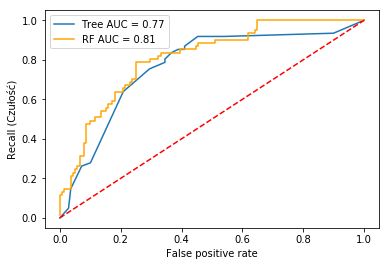

In [35]:
# Prognozujemy prawodpodobieństwa
prob_tree = tree_grid.predict_proba(X_test)
prob_rf = rf_grid.predict_proba(X_test)

# KRZYWE ROC
fpr, recall, tresh = metrics.roc_curve(y_test, prob_tree[:, 1])
fpr_rf, recall_rf, tresh_rf = metrics.roc_curve(y_test, prob_rf[:, 1])

# Miara AUC
auc = metrics.roc_auc_score(y_test, prob_tree[:, 1])
auc_rf = metrics.roc_auc_score(y_test, prob_rf[:, 1])

# Rysujemy wykres
plt.plot(fpr, recall, label = "Tree AUC = %0.2f" %auc)
plt.plot(fpr_rf, recall_rf, color = "orange",label = "RF AUC = %0.2f" %auc_rf)
plt.legend()
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False positive rate')
plt.ylabel('Recall (Czułość)')

In [36]:
pred_rf = np.where(prob_rf>0.3, 1, 0)
print(metrics.confusion_matrix(y_test, pred_rf[:,1]))
print("Kappa: {:.3f}".format(metrics.cohen_kappa_score(y_test, pred_rf[:,1])))
print("Accuracy: {}".format(metrics.accuracy_score(y_test, pred_rf[:,1])))
print(metrics.classification_report(y_test, pred_rf[:,1]))

[[89 50]
 [10 51]]
Kappa: 0.402
Accuracy: 0.7
             precision    recall  f1-score   support

          0       0.90      0.64      0.75       139
          1       0.50      0.84      0.63        61

avg / total       0.78      0.70      0.71       200



In [37]:
139/200 # trafność gdybyśmy wszystkich prgnozowali jako 0 

0.695

# Support Vactor Machines - SVM

In [38]:
from sklearn import svm

### Do modelu SVM należy wystandaryzować dane

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Budujemy model

In [54]:
svm_model = svm.SVC(probability = True)

In [55]:
parameters = {'C':(0.1, 0.3), 'gamma':(0.01, 0.05)}

In [56]:
svm_grid = GridSearchCV(svm_model, parameters, n_jobs = -1,
            verbose = 1, scoring = "roc_auc", cv = 3)

In [57]:
svm_grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.6s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': (0.1, 0.3), 'gamma': (0.01, 0.05)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [58]:
svm_grid.best_params_

{'C': 0.3, 'gamma': 0.01}

### Prognoza z modelu, ocena jakości prognóz

Text(0,0.5,'Recall (Czułość)')

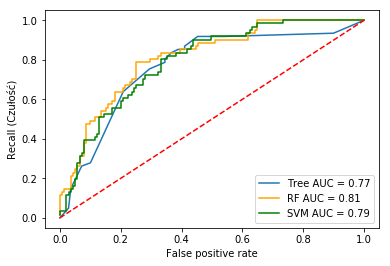

In [60]:
# Prognozujemy prawodpodobieństwa
prob_svm = svm_grid.predict_proba(X_test)


# KRZYWE ROC
fpr_svm, recall_svm, tresh_svm = metrics.roc_curve(y_test, prob_svm[:, 1])


# Miara AUC
auc_svm = metrics.roc_auc_score(y_test, prob_svm[:, 1])

# Rysujemy wykres
plt.plot(fpr, recall, label = "Tree AUC = %0.2f" %auc)
plt.plot(fpr_rf, recall_rf, color = "orange",label = "RF AUC = %0.2f" %auc_rf)
plt.plot(fpr_svm, recall_svm,color = 'green', label = "SVM AUC = %0.2f" %auc_svm)
plt.legend()
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False positive rate')
plt.ylabel('Recall (Czułość)')

# Sieci neuronowe

In [68]:
from sklearn.neural_network import MLPClassifier

In [97]:
nn = MLPClassifier(learning_rate_init=0.001, max_iter=2000, early_stopping = True)

In [75]:
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [76]:
nn.score(X_train, y_train) # Accuracy na zbiorze treningowym

0.99750000000000005

In [77]:
nn.score(X_test, y_test) # Accuracy na zbiorze testowym

0.68000000000000005

In [104]:
# Spróbujmy zrobić Grid Search i poprawić scoring = "roc_auc"
# jakie pramerty możemy np. tuningować - activation, max_iter, learning_rate_init, learning rate
parameters = {
    'learning_rate_init' : (0.01, 0.05),
    'max_iter': (1000, 200),
    'activation': ('tanh', 'relu')
}
nn_grid = GridSearchCV(nn, parameters,  n_jobs = -1, verbose = 1, cv = 3, scoring="roc_auc")

In [105]:
nn_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    5.8s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate_init': (0.01, 0.05), 'max_iter': (1000, 200), 'activation': ('tanh', 'relu')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [106]:
nn_grid.best_params_

{'activation': 'relu', 'learning_rate_init': 0.05, 'max_iter': 200}

In [107]:
nn_grid.best_score_

0.75647015987781774

In [108]:
print(nn_grid.score(X_train, y_train)) # Accuracy
print(nn_grid.score(X_test, y_test)) # Accuracy

0.866757657799
0.827809883241


In [109]:
# Prognozujemy prawodpodobieństwa
prob_nn = nn_grid.predict_proba(X_test)

# Porównanie wszystkich modeli za pomocą krzywej ROC

Text(0,0.5,'Recall (Czułość)')

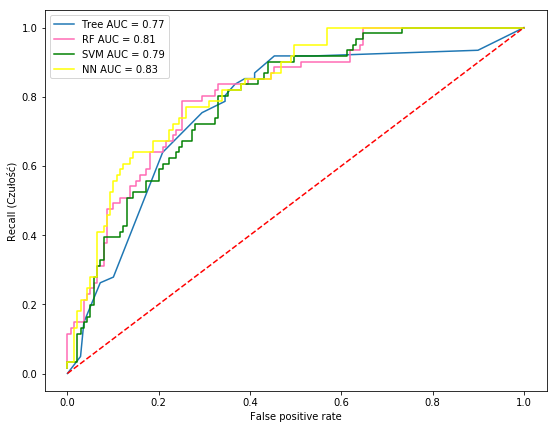

In [110]:
# KRZYWE ROC
fpr_nn, recall_nn, tresh_nn = metrics.roc_curve(y_test, prob_nn[:, 1])


# Miara AUC
auc_nn = metrics.roc_auc_score(y_test, prob_nn[:, 1])



# Rysujemy wykres
plt.figure(figsize = (9,7))
plt.plot(fpr, recall, label = "Tree AUC = %0.2f" %auc)
plt.plot(fpr_rf, recall_rf, color = "hotpink",label = "RF AUC = %0.2f" %auc_rf)
plt.plot(fpr_svm, recall_svm,color = 'green', label = "SVM AUC = %0.2f" %auc_svm)
plt.plot(fpr_nn, recall_nn,color = 'yellow', label = "NN AUC = %0.2f" %auc_nn)
plt.legend()
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False positive rate')
plt.ylabel('Recall (Czułość)')

Najlepsza okazała się być sieć neuronowa, choć jak widzimy dla pewnych progów prawdopodobieństwa model random forest i drzewo decyzyjne okazują sie być lepsze.

----------------